# Introduction

## In this notebook i will:


* ### Transfer the Data Frame to three data-sets
* ### Each data set will be used for a specific purpose
* ### Analysing and Visualising and Cleaning the Data
* ### Converting data from numeric to descriptive
* ### Turn the feature into a predictable target
* ### Create a DataSet
* ### Applying Machine Learning Models
* ### Applying calibration

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Load the Dataset

In [2]:
df = pd.read_csv('../input/depression-anxiety-stress-scales-responses/data.csv',sep= '\t')
# view dimensions of dataset
df.shape

(39775, 172)

In [3]:
# preview the dataset
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


# Explor null values

Text(0.5, 1.0, 'Null Values in Data Frame')

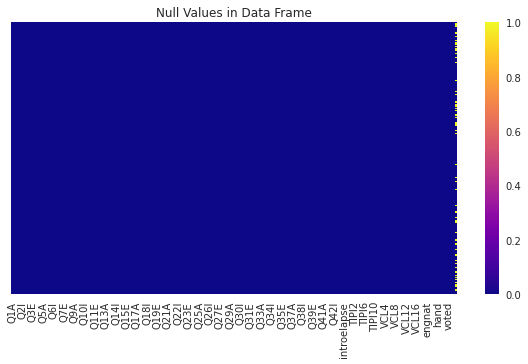

In [4]:
plt.style.use('seaborn')
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [5]:
# get the number of missing data points per column
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is: ',total_missing_value / total_cells *100 )
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)

country        2
major      11403
dtype: int64
Percentage of missing value in Data Frame is:  0.16670808179731922
Total number of our cells is : 6841300
Total number of our missing value is : 11405


Percentage of lost data 0.16%
Fortunately, the amount of missing data is small and the big factor behind this percentage is the column “major”, so I will delete it.

# Dealing with missing values

In [6]:
# Delete 'major' column
df = df.drop('major', axis = 1)
print("New shape of our data", df.shape)

New shape of our data (39775, 171)


In [7]:
# Explor country variable
print(df['country'].value_counts())

MY    21605
US     8207
GB     1180
CA      978
ID      884
      ...  
UZ        1
AM        1
AF        1
IM        1
VC        1
Name: country, Length: 145, dtype: int64


* we can see that the most are from **'Malaysia'**,so i'll change (2) missing variable to **'MY'** country

In [8]:
# change 2 null values to 'MY' country
df['country'].fillna('MY', axis = 0, inplace = True)

# Select Features

In [9]:
# this data frame would be use to define
# the relationship between the features
# and for modling
df = df[['Q36A','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10']]
# this data set would be use for Analysis
select_features = ['Q36A','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10']
selected_features = df[select_features]
selected_features.head()

,Q36A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,4,1,5,7,7,7,7,7,5,1,1
1,3,6,5,4,7,5,4,7,7,1,5
2,4,2,5,2,2,5,6,5,5,3,2
3,1,1,1,7,4,6,4,6,1,6,1
4,4,2,5,3,6,5,5,5,6,3,3


# Clarify features

* Q36	I felt terrified.

**Each item was presented one at a time in a random order for each new participant along with a 4 point rating scale asking the user to indicate how often that had been true of them in the past week where**

1 = Did not apply to me at all 
2 = Applied to me to some degree, or some of the time
3 = Applied to me to a considerable degree, or a good part of the time
4 = Applied to me very much, or most of the time

* TIPI1	Extraverted, enthusiastic.
* TIPI2	Critical, quarrelsome.
* TIPI3	Dependable, self-disciplined.
* TIPI4	Anxious, easily upset.
* TIPI5	Open to new experiences, complex.
* TIPI6	Reserved, quiet.
* TIPI7	Sympathetic, warm.
* TIPI8	Disorganized, careless.
* TIPI9	Calm, emotionally stable.
* TIPI10	Conventional, uncreative.

**The TIPI items were rated "I see myself as:" _____ such that**

1 = Disagree strongly
2 = Disagree moderately
3 = Disagree a little
4 = Neither agree nor disagree
5 = Agree a little
6 = Agree moderately
7 = Agree strongly


* education			"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
* gender				"What is your gender?", 1=Male, 2=Female, 3=Other
* engnat				"Is English your native language?", 1=Yes, 2=No
* age					"How many years old are you?"
* religion			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other

* race				"What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other
* married				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
* familysize			"Including you, how many children did your mother have?"

* country				ISO country code of where the user connected from

# Rename Features

In [10]:
selected_features['TIPI1'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI2'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI3'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI4'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI5'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI6'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI7'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI8'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI9'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)
selected_features['TIPI10'].replace({0:'o',1:'Disagree strongly', 2:'Disagree moderately', 3: 'Disagree a little', 4:'Neither agree nor disagree', 5:'Agree a little', 6:'Agree moderately', 7:'Agree strongly'}, inplace = True)

selected_features.rename(columns={'Q36A' : 'terrified',
                                  'TIPI1':'Extraverted_enthusiastic',
                                  'TIPI2':'Critical_quarrelsome',
                                  'TIPI3':'Dependable_selfdisciplined',
                                  'TIPI4':'Anxious_easilyupset',
                                  'TIPI5':'Opentonewexperiences_complex',
                                  'TIPI6':'Reserved_quiet',
                                  'TIPI7':'Sympathetic_warm',
                                  'TIPI8':'Disorganized_careless',
                                  'TIPI9':'Calm_emotionallystable',
                                  'TIPI10':'Conventional_uncreative'}, inplace = True)

df.rename(columns={'Q36A' : 'terrified',
                    'TIPI1':'Extraverted_enthusiastic',
                    'TIPI2':'Critical_quarrelsome',
                    'TIPI3':'Dependable_selfdisciplined',
                    'TIPI4':'Anxious_easilyupset',
                    'TIPI5':'Opentonewexperiences_complex',
                    'TIPI6':'Reserved_quiet',
                    'TIPI7':'Sympathetic_warm',
                    'TIPI8':'Disorganized_careless',
                    'TIPI9':'Calm_emotionallystable',
                    'TIPI10':'Conventional_uncreative'}, inplace = True)


personality_types = selected_features

**I want delete 2 and 3 values from 'terrified', because we should have two classes to do a binary Classification**
* 1 = Did not apply to me at all # not terrified at all
* 2 = Applied to me to some degree, or some of the time # I can't include this value in " not terrified" because it's terrified to a certain degree, and also I can't include it in "terrified" because it's not terrified most of the timei'll delete it.
* 3 = Applied to me to a considerable degree, or a good part of the time # also i'll delete it for the same reason
* 4 = Applied to me very much, or most of the time # terrified

In [11]:
# Select the values
twos_df = personality_types[(personality_types['terrified'] == 2)]
threes_df = personality_types[(personality_types['terrified'] == 3)]

In [12]:
# drop the values
personality_types.drop(twos_df['terrified'].index,axis=0,inplace=True)
df.drop(twos_df['terrified'].index,axis=0,inplace=True)
personality_types.drop(threes_df['terrified'].index,axis=0,inplace=True)
df.drop(threes_df['terrified'].index,axis=0,inplace=True)

In [13]:
personality_types['terrified'].value_counts()

1    12517
4     7974
Name: terrified, dtype: int64

In [14]:
# change the values to two classes (1,0)
personality_types['terrified'].replace({1:0,4:1},inplace = True)
df['terrified'].replace({1:0,4:1},inplace = True)

In [15]:
personality_types['terrified'].value_counts()

0    12517
1     7974
Name: terrified, dtype: int64

* **1**: means Terrified.
* **0**: means not Terrified

# Selected Data-Sets

In [16]:
# preview new df
df.head()

,terrified,Extraverted_enthusiastic,Critical_quarrelsome,Dependable_selfdisciplined,Anxious_easilyupset,Opentonewexperiences_complex,Reserved_quiet,Sympathetic_warm,Disorganized_careless,Calm_emotionallystable,Conventional_uncreative
0,1,1,5,7,7,7,7,7,5,1,1
2,1,2,5,2,2,5,6,5,5,3,2
3,0,1,1,7,4,6,4,6,1,6,1
4,1,2,5,3,6,5,5,5,6,3,3
7,0,7,6,4,5,3,2,6,3,5,2


In [17]:
# preview new personality_types Data-Set
personality_types.head()

,terrified,Extraverted_enthusiastic,Critical_quarrelsome,Dependable_selfdisciplined,Anxious_easilyupset,Opentonewexperiences_complex,Reserved_quiet,Sympathetic_warm,Disorganized_careless,Calm_emotionallystable,Conventional_uncreative
0,1,Disagree strongly,Agree a little,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree a little,Disagree strongly,Disagree strongly
2,1,Disagree moderately,Agree a little,Disagree moderately,Disagree moderately,Agree a little,Agree moderately,Agree a little,Agree a little,Disagree a little,Disagree moderately
3,0,Disagree strongly,Disagree strongly,Agree strongly,Neither agree nor disagree,Agree moderately,Neither agree nor disagree,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly
4,1,Disagree moderately,Agree a little,Disagree a little,Agree moderately,Agree a little,Agree a little,Agree a little,Agree moderately,Disagree a little,Disagree a little
7,0,Agree strongly,Agree moderately,Neither agree nor disagree,Agree a little,Disagree a little,Disagree moderately,Agree moderately,Disagree a little,Agree a little,Disagree moderately


In [18]:
print("New shapes of our data is: ")
print(personality_types.shape,df.shape)

New shapes of our data is: 
(20491, 11) (20491, 11)


# Exploratory Data Analysis(EDA)

### I did a previous [notebook](https://www.kaggle.com/code/ahedjneed/personality-types-analysis) if you go there, you'll finde complete EDA for this Data Set

In [19]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

**terrified**

In [20]:
personality_types['terrified'].value_counts()

0    12517
1     7974
Name: terrified, dtype: int64

In [21]:
pie_graph(personality_types,'terrified Distribution','terrified')

**Extraverted_enthusiastic**

In [22]:
personality_types['Extraverted_enthusiastic'].value_counts()

Agree a little                4054
Disagree strongly             3545
Agree moderately              3239
Neither agree nor disagree    2800
Disagree moderately           2782
Disagree a little             2249
Agree strongly                1582
o                              240
Name: Extraverted_enthusiastic, dtype: int64

In [23]:
pie_graph(personality_types,'Extraverted, enthusiastic Distribution','Extraverted_enthusiastic')

**Critical_quarrelsome**

In [24]:
personality_types['Critical_quarrelsome'].value_counts()

Agree a little                5113
Agree moderately              3452
Neither agree nor disagree    3026
Disagree strongly             2391
Disagree a little             2157
Disagree moderately           2083
Agree strongly                1979
o                              290
Name: Critical_quarrelsome, dtype: int64

In [25]:
pie_graph(personality_types,'Critical, quarrelsome Distribution','Critical_quarrelsome')

**Dependable_selfdisciplined**

In [26]:
personality_types['Dependable_selfdisciplined'].value_counts()

Agree moderately              5337
Agree a little                4336
Agree strongly                3754
Neither agree nor disagree    2157
Disagree a little             1881
Disagree moderately           1440
Disagree strongly             1290
o                              296
Name: Dependable_selfdisciplined, dtype: int64

In [27]:
pie_graph(personality_types,'Dependable_selfdisciplined Distribution','Dependable_selfdisciplined')

**Anxious_easilyupset**

In [28]:
personality_types['Anxious_easilyupset'].value_counts()

Agree strongly                6045
Agree a little                4130
Agree moderately              3922
Disagree moderately           1632
Disagree strongly             1615
Disagree a little             1455
Neither agree nor disagree    1454
o                              238
Name: Anxious_easilyupset, dtype: int64

In [29]:
pie_graph(personality_types,'Anxious_easilyupset Distribution','Anxious_easilyupset')

**Opentonewexperiences_complex**

In [30]:
personality_types['Opentonewexperiences_complex'].value_counts()

Agree moderately              4983
Agree a little                4543
Agree strongly                4476
Neither agree nor disagree    2506
Disagree a little             1618
Disagree moderately           1093
Disagree strongly             1005
o                              267
Name: Opentonewexperiences_complex, dtype: int64

In [31]:
pie_graph(personality_types,'Open to new experiences, complex Distribution','Opentonewexperiences_complex')

**Reserved_quiet**

In [32]:
personality_types['Reserved_quiet'].value_counts()

Agree strongly                5188
Agree moderately              3948
Agree a little                3894
Neither agree nor disagree    2423
Disagree a little             1723
Disagree strongly             1590
Disagree moderately           1479
o                              246
Name: Reserved_quiet, dtype: int64

In [33]:
pie_graph(personality_types,'Reserved_quiet Distribution','Reserved_quiet')

**Sympathetic_warm**

In [34]:
personality_types['Sympathetic_warm'].value_counts()

Agree strongly                5453
Agree moderately              5407
Agree a little                4499
Neither agree nor disagree    2200
Disagree a little             1174
Disagree moderately            783
Disagree strongly              676
o                              299
Name: Sympathetic_warm, dtype: int64

In [35]:
pie_graph(personality_types,'Sympathetic_warm Distribution','Sympathetic_warm')

**Disorganized_careless**

In [36]:
personality_types['Disorganized_careless'].value_counts()

Agree a little                4520
Agree strongly                3223
Agree moderately              3013
Disagree strongly             2517
Disagree moderately           2390
Neither agree nor disagree    2267
Disagree a little             2248
o                              313
Name: Disorganized_careless, dtype: int64

In [37]:
pie_graph(personality_types,'Disorganized_careless Distribution','Disorganized_careless')

**Calm, emotionally stable**

In [38]:
personality_types['Calm_emotionallystable'].value_counts()

Agree a little                3250
Disagree strongly             3169
Neither agree nor disagree    3088
Disagree a little             3038
Agree moderately              2958
Disagree moderately           2941
Agree strongly                1833
o                              214
Name: Calm_emotionallystable, dtype: int64

In [39]:
pie_graph(personality_types,'Calm, emotionally stable Distribution','Calm_emotionallystable')

**Conventional_uncreative**

In [40]:
personality_types['Conventional_uncreative'].value_counts()

Neither agree nor disagree    3709
Disagree strongly             3213
Agree a little                3142
Disagree a little             3121
Disagree moderately           3043
Agree moderately              1995
Agree strongly                1985
o                              283
Name: Conventional_uncreative, dtype: int64

In [41]:
pie_graph(personality_types,'Conventional_uncreative Distribution','Conventional_uncreative')

In [42]:
# This data set will be used
#to compare the sum of the values for each personality type
data = [['Extraverted_enthusiastic',480,6194,5583,4611,5841,8368,6010,2465],
       ['Critical_quarrelsome',565,3955,4019,4300,6134,10332,6951,3296],
       ['Dependable_selfdisciplined',584,2238,2830,3967,4502,9077,10165,6189],
       ['Anxious_easilyupset',459,2030,2429,2418,2705,8691,9524,11296],
       ['Opentonewexperiences_complex',512,1637,2216,3325,5109,9479,9638,7636],
       ['Reserved_quiet',485,2647,2734,3455,4920,7700,8045,9566],
       ['Sympathetic_warm',596,1008,1361,2256,4398,9046,10946,9941],
       ['Disorganized_careless',653,4117,4423,4416,4554,9252,6331,5806],
       ['Calm_emotionallystable',423,5480,6367,6789,6801,6214,4912,2566],
       ['Conventional_uncreative',550,5382,5683,6156,7626,6609,4080,3466]]

              

column_names = ['personality_types','unknown','Disagree strongly', 'Disagree moderately', 'Disagree a little','Neither agree nor disagree','Agree a little','Agree moderately','Agree strongly']
personality_types_value_counts = pd.DataFrame(data,columns = column_names) 

In [43]:
# preview new personality_typesvalue_counts Data-Set
personality_types_value_counts.head()

,personality_types,unknown,Disagree strongly,Disagree moderately,Disagree a little,Neither agree nor disagree,Agree a little,Agree moderately,Agree strongly
0,Extraverted_enthusiastic,480,6194,5583,4611,5841,8368,6010,2465
1,Critical_quarrelsome,565,3955,4019,4300,6134,10332,6951,3296
2,Dependable_selfdisciplined,584,2238,2830,3967,4502,9077,10165,6189
3,Anxious_easilyupset,459,2030,2429,2418,2705,8691,9524,11296
4,Opentonewexperiences_complex,512,1637,2216,3325,5109,9479,9638,7636


# Analysing  personality types

In [44]:
def horizontal_bar_chart(df,x,y,color,title):    
    fig = px.bar(df, x=x, y=y, color=color,                  
                 height=600,
                 title=title)
    fig.show()

In [45]:
def bar_plot(df,x,y,title):
    fig = px.bar(df, x = x, y = y,
                title = title)
    fig.show()

In [46]:
group = personality_types.groupby(['Extraverted_enthusiastic','terrified'],as_index = False).size()

In [47]:
horizontal_bar_chart(df = group,x = 'Extraverted_enthusiastic',y = 'size',color = 'terrified',title = 'Distribution of Extraverted&enthusiastic terrified')

In [48]:
group = personality_types.groupby(['Critical_quarrelsome','terrified'],as_index = False).size()

In [49]:
horizontal_bar_chart(df = group,x = 'Critical_quarrelsome',y = 'size',color = 'terrified',title = 'Distribution of Critical&quarrelsome terrified')

In [50]:
group = personality_types.groupby(['Dependable_selfdisciplined','terrified'],as_index = False).size()

In [51]:
horizontal_bar_chart(df = group,x = 'Dependable_selfdisciplined',y = 'size',color = 'terrified',title = 'Distribution of Dependable&self-disciplined terrified')

In [52]:
group = personality_types.groupby(['Anxious_easilyupset','terrified'],as_index = False).size()

In [53]:
horizontal_bar_chart(df = group,x = 'Anxious_easilyupset',y = 'size',color = 'terrified',title = 'Distribution of Anxious&easilyupset terrified')

In [54]:
group = personality_types.groupby(['Opentonewexperiences_complex','terrified'],as_index = False).size()

In [55]:
horizontal_bar_chart(df = group,x = 'Opentonewexperiences_complex',y = 'size',color = 'terrified',title = 'Distribution of Open to new experiences&complex terrified')

In [56]:
group = personality_types.groupby(['Reserved_quiet','terrified'],as_index = False).size()

In [57]:
horizontal_bar_chart(df = group,x = 'Reserved_quiet',y = 'size',color = 'terrified',title = 'Distribution of Reserved&quiet terrified')

In [58]:
group = personality_types.groupby(['Sympathetic_warm','terrified'],as_index = False).size()

In [59]:
horizontal_bar_chart(df = group,x = 'Sympathetic_warm',y = 'size',color = 'terrified',title = 'Distribution of Sympathetic&warm terrified')

In [60]:
group = personality_types.groupby(['Disorganized_careless','terrified'],as_index = False).size()

In [61]:
horizontal_bar_chart(df = group,x = 'Disorganized_careless',y = 'size',color = 'terrified',title = 'Distribution of Disorganized&careless terrified')

In [62]:
group = personality_types.groupby(['Calm_emotionallystable','terrified'],as_index = False).size()

In [63]:
horizontal_bar_chart(df = group,x = 'Calm_emotionallystable',y = 'size',color = 'terrified',title = 'Distribution of Calm&emotionallystable terrified')

In [64]:
group = personality_types.groupby(['Conventional_uncreative','terrified'],as_index = False).size()

In [65]:
horizontal_bar_chart(df = group,x = 'Conventional_uncreative',y = 'size',color = 'terrified',title = 'Distribution of Conventional&uncreative terrified')

In [66]:
bar_plot(personality_types_value_counts,'personality_types','Disagree strongly','Distiribution by Disagree strongly')

In [67]:
bar_plot(personality_types_value_counts,'personality_types','Disagree moderately','Distiribution by Disagree moderately')

In [68]:
bar_plot(personality_types_value_counts,'personality_types','Disagree a little','Distiribution by Disagree a little')

In [69]:
bar_plot(personality_types_value_counts,'personality_types','Neither agree nor disagree','Distiribution by Neither agree nor disagree')

In [70]:
bar_plot(personality_types_value_counts,'personality_types','Agree a little','Distiribution by Agree a little')

In [71]:
bar_plot(personality_types_value_counts,'personality_types','Agree moderately','Distiribution by Agree moderately')

In [72]:
bar_plot(personality_types_value_counts,'personality_types','Agree strongly','Distiribution by Agree strongly')

<AxesSubplot:>

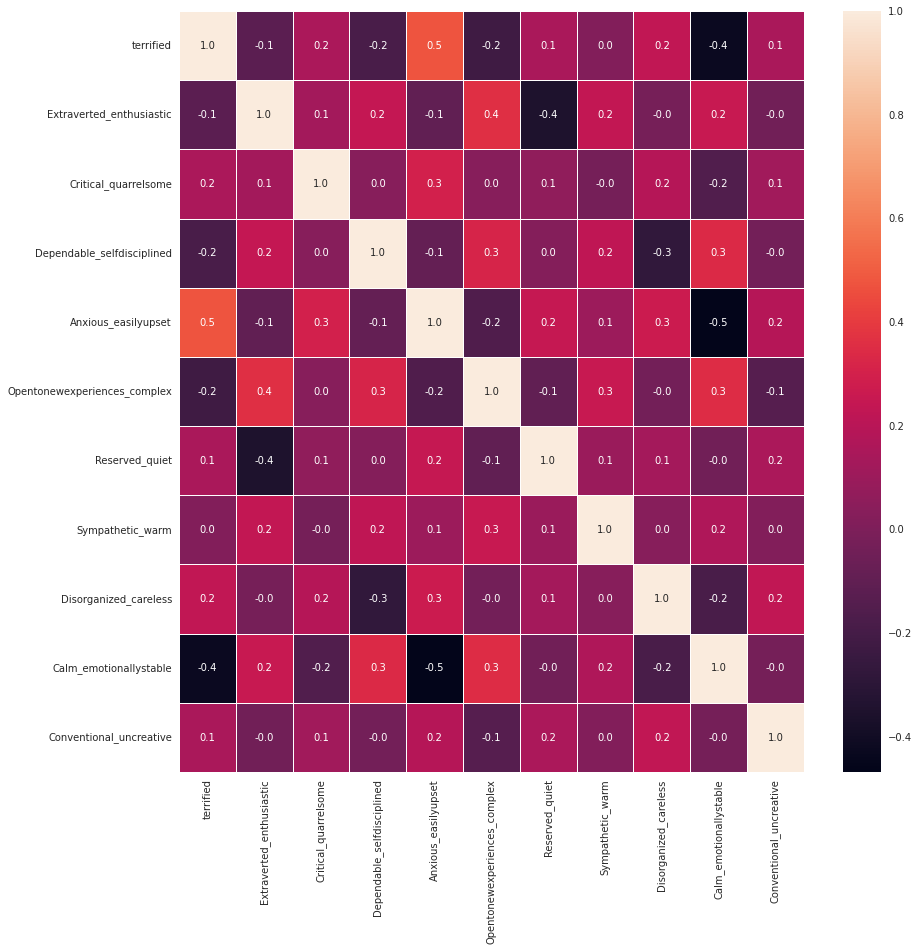

In [73]:
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),
            annot = True, 
            linewidths = .5, 
            fmt = '.1f',
            ax = ax)

* **As we can that there is a simple relationship between the Features. That means, i think we can have a lower Accuracy depending on these Features**

**So let's Build the Models to see what we can get**

# Apply ML Models

**Declare feature vector and target variable**

In [74]:
X = df.drop('terrified', axis = 1)
y = df['terrified']

**Split data into separate training and test set**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 777
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16392, 10), (4099, 10), (16392,), (4099,))

**Build Random Forest Classifier Model**

Model Accuracy is:  0.7801902903147109


<AxesSubplot:>

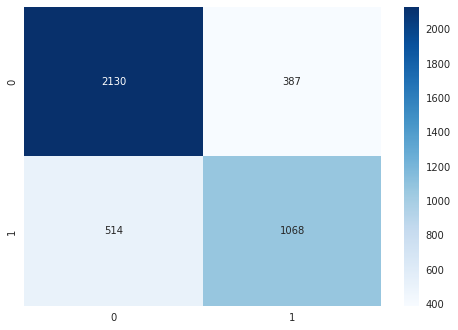

In [76]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state = 777)
# fit the model to the training set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model Accuracy is: ',accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="",cmap='Blues')

**Building Ada Boost Classifier Model**

AdaBoost Classifier Model Accuracy: 0.7840936813857038


<AxesSubplot:>

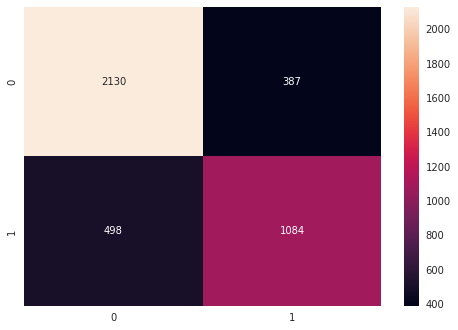

In [77]:
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 0)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_abc))
cm = confusion_matrix(y_test,abc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

**Build Logistic Regression Model**

Logistic Regression accuracy is : 0.7675042693339839
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2517
           1       0.72      0.66      0.69      1582

    accuracy                           0.77      4099
   macro avg       0.76      0.75      0.75      4099
weighted avg       0.77      0.77      0.77      4099



<AxesSubplot:>

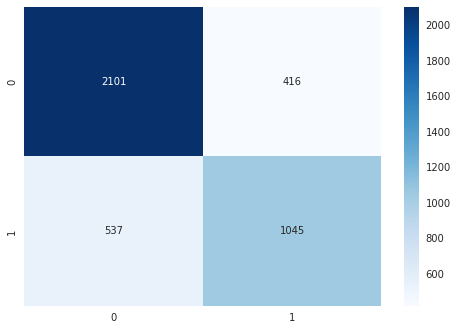

In [78]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print("-"*100)
print(report)
cm = confusion_matrix(y_test,lr_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# SMOTE Technique

In [79]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(20491, 10)
Shape of X after SMOTE:(25034, 10) 


Target Class distributuion before SMOTE:
0    0.610854
1    0.389146
Name: terrified, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: terrified, dtype: float64


**Split data into separate training and test set**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 777)

**Build Random Forest Classifier Model**

Model Accuracy is:  0.7946874375873777


<AxesSubplot:>

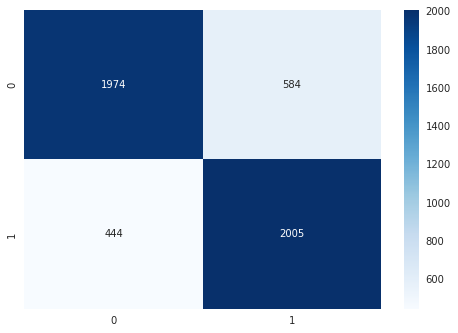

In [81]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state = 777)
# fit the model to the training set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model Accuracy is: ',accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="",cmap='Blues')

**Building Ada Boost Classifier Model**

AdaBoost Classifier Model Accuracy: 0.7649290992610346


<AxesSubplot:>

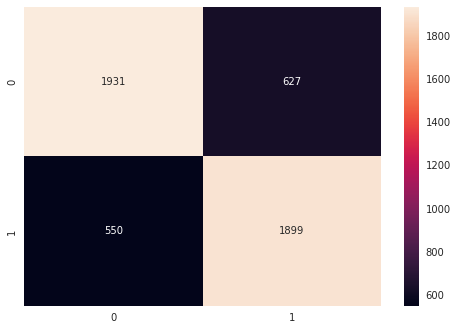

In [82]:
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 0)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_abc))
cm = confusion_matrix(y_test,abc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

**Build Logistic Regression Model**

Logistic Regression accuracy is : 0.7433592969842221
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2558
           1       0.72      0.78      0.75      2449

    accuracy                           0.74      5007
   macro avg       0.74      0.74      0.74      5007
weighted avg       0.75      0.74      0.74      5007



<AxesSubplot:>

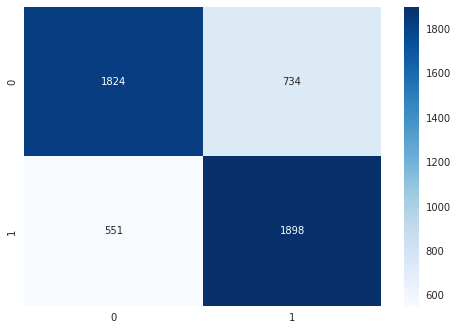

In [83]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print("-"*100)
print(report)
cm = confusion_matrix(y_test,lr_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

**Build Gradient Boosting Classifier**

Gradient Boosting Classifier 0.7693229478729778


<AxesSubplot:>

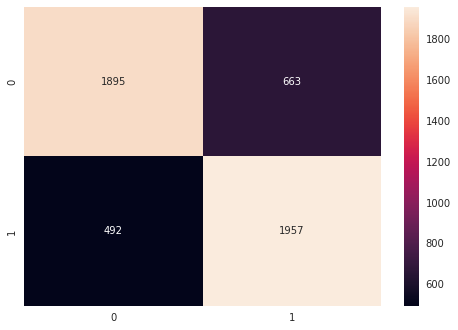

In [84]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
cm = confusion_matrix(y_test,gb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

**Build KNN Model**

In [85]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.768723786698622


**Build SVC Model**

In [86]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7673257439584582


**Build Voting Classifier**

In [87]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))

Voting Classifier Accuracy Score is: 
0.7619332933892551


# Applying calibration

let’s use **sigmoid** calibration:

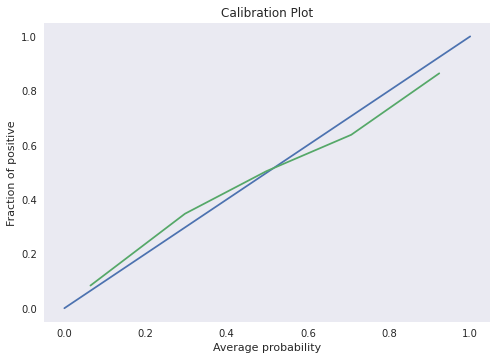

calibrated sigmoid model Accuracy Score is:  0.7984821250249651


In [88]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
rfc = RandomForestClassifier()
calibrated_sigmoid_model = CalibratedClassifierCV(rfc,
                                          method = 'sigmoid',
                                          cv = 5)
calibrated_sigmoid_model.fit(X_train, y_train)

prob = calibrated_sigmoid_model.predict_proba(X_test)[:,1]
fop, apv = calibration_curve(y_test, prob, n_bins = 5, normalize = True)

plt.plot([0,1],[0,1])
plt.plot(apv,fop)
plt.grid()
plt.xlabel("Average probability")
plt.ylabel("Fraction of positive")
plt.title("Calibration Plot")
plt.show()
psig = calibrated_sigmoid_model.predict(X_test)
print("calibrated sigmoid model Accuracy Score is: ",accuracy_score(psig,y_test))


Now let’s use **isotonic** calibration:

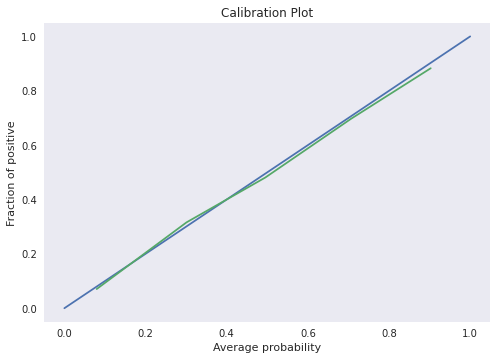

calibrated isotonic model Accuracy Score is:  0.7972838026762532


In [89]:
calibrated_isotonic_model = CalibratedClassifierCV(rfc,
                                          method = 'isotonic',
                                          cv = 5)
calibrated_isotonic_model.fit(X_train, y_train)

prob = calibrated_isotonic_model.predict_proba(X_test)[:,1]
fop, apv = calibration_curve(y_test, prob, n_bins = 5, normalize = True)

plt.plot([0,1],[0,1])
plt.plot(apv,fop)
plt.grid()
plt.xlabel("Average probability")
plt.ylabel("Fraction of positive")
plt.title("Calibration Plot")
plt.show()
piso = calibrated_isotonic_model.predict(X_test)
print("calibrated isotonic model Accuracy Score is: ",accuracy_score(piso,y_test))

**As we can see that we have almost 80% accuracy and whiche is bad, but my Goal was just to see if i can have high accuracy depends on Personality types.**

**So that means if you want high Accuracy just add more Features and you'll get a high Accuracy**




## I hope you enjoyed in this kernel



